<a href="https://colab.research.google.com/github/yasath-04/UOM-AI-session_Term1/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("Housing.csv")   # make sure Housing.csv is in your folder
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

In [4]:
# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]

In [5]:
# Split data (train/val/test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Build model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Evaluate
def evaluate_model(model, X, y, label="Dataset"):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{label} -> MSE: {mse:.2f}, R2: {r2:.2f}")
    return y_pred


In [8]:
y_train_pred = evaluate_model(model, X_train, y_train, "Train")
y_val_pred   = evaluate_model(model, X_val, y_val, "Validation")
y_test_pred  = evaluate_model(model, X_test, y_test, "Test")

Train -> MSE: 963835379828.36, R2: 0.69
Validation -> MSE: 1787515483846.20, R2: 0.59
Test -> MSE: 1258523455156.38, R2: 0.71


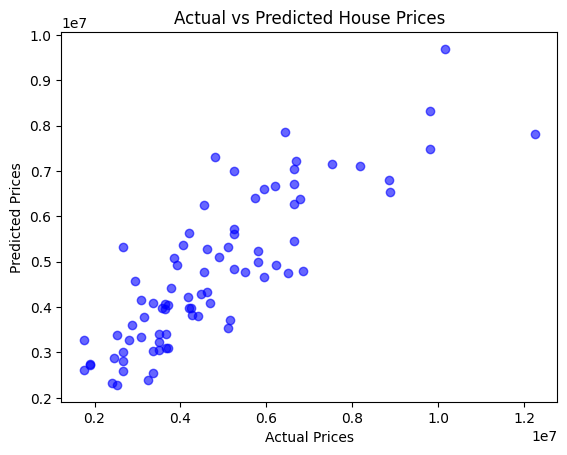

In [9]:
# Visualization
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [14]:
def predict_price(model, X_train_columns, area, bedrooms, bathrooms, stories, mainroad, guestroom,
                  basement, hotwaterheating, airconditioning, parking,
                  prefarea, furnishingstatus):

    # Create a DataFrame for the new data point
    new_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking],
        'mainroad_yes': [1 if mainroad.lower() == 'yes' else 0],
        'guestroom_yes': [1 if guestroom.lower() == 'yes' else 0],
        'basement_yes': [1 if basement.lower() == 'yes' else 0],
        'hotwaterheating_yes': [1 if hotwaterheating.lower() == 'yes' else 0],
        'airconditioning_yes': [1 if airconditioning.lower() == 'yes' else 0],
        'prefarea_yes': [1 if prefarea.lower() == 'yes' else 0],
        'furnishingstatus_semi-furnished': [1 if furnishingstatus.lower() == 'semi-furnished' else 0],
        'furnishingstatus_unfurnished': [1 if furnishingstatus.lower() == 'unfurnished' else 0]
    })

    # Reindex to match training columns (fill missing columns with 0)
    new_data = new_data.reindex(columns=X_train_columns, fill_value=0)

    # Make prediction
    predicted_price = model.predict(new_data)[0]
    print(f"Predicted House Price: {predicted_price:,.2f} INR")
    return predicted_price


- input my data and predicting the price

In [16]:
predict_price(
    model,
    X_train.columns,
    area=10000,
    bedrooms=4,
    bathrooms=4,
    stories=1,
    mainroad='no',
    guestroom='yes',
    basement='yes',
    hotwaterheating='yes',
    airconditioning='yes',
    parking=2,
    prefarea='no',
    furnishingstatus='semi-furnished'
)


🏠 Predicted House Price: 10,373,600.24 INR


np.float64(10373600.24166602)